# Opening a Restaurant for Clients with Certain Food Restrictions in Tokyo

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#Discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>


As of 2021, Tokyo prefecture has an estimated population of 13,960,236. The Greater Tokyo Area is the most populous metropolitan area in the world, with more than 37.393 million residents as of 2020. 
Although there are over 148,000 (Annual Report on Food Sanitation 2016) restaurants in Tokyo, most of them focus on serving the Japanese client like Ramen restaurants, Tonkatsu restaurants, ... etc. With the increasing number of foreigners in Tokyo in the past years, few restaurants started to focus on serving clients with food restrictions, but still not enough.
The aim of this report is to explore best locations for opening a restaurant for clients with certain food restrictions in Tokyo. For opening such a unique restaurant, picking the proper place is a key factor for such risky investment as it affects its chances of success or failure. Depending on the available data, I would like to give some insights about it.
<br>
#### 1.1.	Business Problem: 
The objective of this Capstone project is to analyse and select the best locations in Tokyo to open a new Halal/ Kosher/ Vegan restaurant. Using Data Science methodology and instruments such as Data Analysis and Visualization, this project aims to provide solutions to answer the business question: Where in Tokyo, should the investor open such a restaurant.
<br>
#### 1.2.	Target Audience 

*	Developers and investors looking to open or invest in a niche restaurant in Tokyo as there are many foreigners visiting and living in Japan and some of them have some food restrictions.
*	Business Analysts or Data Scientists, who wish to analyse Tokyo neighbourhoods using python, jupyter notebook and some machine learning techniques.
*	Someone curious about data that want to have an idea, how beneficial it is to open a niche restaurant and what are the pros and cons of this business.


## Data <a name="data"></a>

#### First, we need some information about the wards of Tokyo, we can scrap Wikipedia to get that information:
Data source: https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards
<br>We can then clean the data by getting rid of useless columns and rows and also by renaming the column into easy and meaningful names.

#### Second, we need the latitudes and longitudes of the wards, we can get it using geopy.geocoders.Nominatim from geopy python library

#### Third, by using Foursquare API we will get all the venues in each neighbourhood. 

## Methodology <a name="methodology"></a>

Import some libraries for data mining and preparation

In [1]:
import numpy as np 
import pandas as pd 
print('Libraries imported.')

Libraries imported.


#### First, we need some information about the wards of Tokyo, we can scrap Wikipedia to get that information:
Data source: https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards


In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards')[3]
df.head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


#### Change columns names into easier and more meaningful names 

In [3]:
new_columns = ['Number','Flag','Romaji', 'Kanji','Population','Pop. density per km2','Area in km2','Districts']
df.columns = new_columns
df

,Number,Flag,Romaji,Kanji,Population,Pop. density per km2,Area in km2,Districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


#### Note that Romaji columns represents the Latin spelling of the ward name, while Kanji column represents the name in Chinese characters.
#### Drop non-related columns and the last 'overall' row

In [4]:
df.drop(['Number','Flag', 'Districts'], axis=1, inplace=True)
df.drop([23], inplace=True)
df

,Romaji,Kanji,Population,Pop. density per km2,Area in km2
0,Chiyoda,千代田区,59441,5100,11.66
1,Chūō,中央区,147620,14460,10.21
2,Minato,港区,248071,12180,20.37
3,Shinjuku,新宿区,339211,18620,18.22
4,Bunkyō,文京区,223389,19790,11.29
5,Taitō,台東区,200486,19830,10.11
6,Sumida,墨田区,260358,18910,13.77
7,Kōtō,江東区,502579,12510,40.16
8,Shinagawa,品川区,392492,17180,22.84
9,Meguro,目黒区,280283,19110,14.67


In [5]:
df.shape

(23, 5)

#### Now, we need the latitudes and longitudes of the wards, we can get it using geopy.geocoders.Nominatim from geopy python library. 
#### “Kanji” column is used to retrieve locations from geopy. A sample of the new table after merging the coordinates follows:

In [6]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="tokyo_explorer")

df['Major_Dist_Coord']= df['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Romaji,Kanji,Population,Pop. density per km2,Area in km2,Latitude,Longitude
0,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216
1,Chūō,中央区,147620,14460,10.21,35.666255,139.775565
2,Minato,港区,248071,12180,20.37,35.643227,139.740055
3,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632
4,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732
5,Taitō,台東区,200486,19830,10.11,35.717450,139.790859
6,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017
7,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790
8,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910
9,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014


#### Import other necessary libraries

In [7]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Get Tokyo Coordinates using Nominatim

In [8]:
address = 'Tokyo'
geolocator = Nominatim(user_agent="tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


#### Create a map of Tokyo with wards superimposed on top.

In [9]:
# create map of Tokyo using latitude and longitude values
tokyo_map = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Romaji']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tokyo_map) 
    
tokyo_map

### If the map didn't appear,either mark it as trusted notebook or please click this link: https://github.com/Ganaini/Coursera_Capstone/blob/main/map_Jp.png

#### As we can see, names are shown in kanji, to have it in English and with clearer view, we use 'CartoDB positron' tiles

In [10]:
# create map of Tokyo using latitude and longitude values
tokyo_map = folium.Map(location=[latitude, longitude], tiles='CartoDB positron', zoom_start=9.5)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Romaji']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#ff5487',
        fill=True,
        fill_color='#afed58',
        fill_opacity=0.7,
        parse_html=False).add_to(tokyo_map) 
    
tokyo_map

### If the map didn't appear,either mark it as trusted notebook or please click this link:https://github.com/Ganaini/Coursera_Capstone/blob/main/map.png

#### Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'JOKERNG3N1U3Y452GNQ41H0MP5NACTFIDIGQAFGX4VWQINZ1' # your Foursquare ID
CLIENT_SECRET = 'Q02Z3AQJSJLABKRANE2R4XGCQHNFWI5CNSUWO4JQG3D3NWQO' # your Foursquare Secret
VERSION = '20180605'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JOKERNG3N1U3Y452GNQ41H0MP5NACTFIDIGQAFGX4VWQINZ1
CLIENT_SECRET:Q02Z3AQJSJLABKRANE2R4XGCQHNFWI5CNSUWO4JQG3D3NWQO


#### Let's explore the first neighborhood in our dataframe.
#### Get the neighborhood's name.

In [12]:
df.loc[0, 'Romaji']

'Chiyoda'

#### Get the Chiyoda's latitude and longitude values.

In [13]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = df.loc[0, 'Romaji'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chiyoda are 35.6938097, 139.7532163.


#### Now, let's get the top 100 venues that are in Chiyoda within a radius of 1000 meters.
#### First, let's create the GET request URL. Name your URL url.

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JOKERNG3N1U3Y452GNQ41H0MP5NACTFIDIGQAFGX4VWQINZ1&client_secret=Q02Z3AQJSJLABKRANE2R4XGCQHNFWI5CNSUWO4JQG3D3NWQO&v=20180605&ll=35.6938097,139.7532163&radius=1000&limit=100'

#### Send the GET request and examine the resutls

In [ ]:
results = requests.get(url).json()

#### Define a function that extracts the category of the venue

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we are ready to clean the json and structure it into a pandas dataframe.

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\mahmo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Nippon Budokan (日本武道館),Stadium,35.693356,139.749865
1,Kitanomaru Park (北の丸公園),Park,35.691653,139.751201
2,National Museum of Modern Art (東京国立近代美術館),Art Museum,35.690541,139.754694
3,Kanda Tendonya (神田天丼家),Tempura Restaurant,35.695765,139.754682
4,Bondy (欧風カレー ボンディ),Japanese Curry Restaurant,35.695544,139.757356


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [19]:
print ('{} unique categories in Chiyoda'.format(nearby_venues['categories'].value_counts().shape[0]))

47 unique categories in Chiyoda


In [20]:
print (nearby_venues['categories'].value_counts()[0:10])

Café                         13
Ramen Restaurant              8
Japanese Curry Restaurant     7
Chinese Restaurant            6
Bookstore                     4
Coffee Shop                   4
Historic Site                 4
Tempura Restaurant            4
Sushi Restaurant              3
Noodle House                  2
Name: categories, dtype: int64


#### Explore Neighborhoods in Tokyo
#### Let's create a function to repeat the same process to all the neighborhoods in Tokyo

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

#### write the code to run the above function on each neighborhood and create a new dataframe

In [22]:
Tokyo_venues = getNearbyVenues(names=df['Romaji'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


#### Create a Data-Frame out of it to Concentrate Only on Restaurants 

In [23]:
Tokyo_Venues_only_restaurant = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Tokyo_Venues_only_restaurant.index = np.arange(1, len(Tokyo_Venues_only_restaurant )+1)

In [24]:
print (Tokyo_Venues_only_restaurant['Venue Category'].value_counts())

Ramen Restaurant              59
Chinese Restaurant            41
Japanese Restaurant           41
Sushi Restaurant              35
Soba Restaurant               21
Italian Restaurant            21
Tonkatsu Restaurant           12
Indian Restaurant             11
Donburi Restaurant            10
Yoshoku Restaurant             8
Unagi Restaurant               7
French Restaurant              7
Yakitori Restaurant            6
Teishoku Restaurant            6
Seafood Restaurant             5
Dumpling Restaurant            5
Korean Restaurant              5
Tempura Restaurant             4
Udon Restaurant                4
Japanese Curry Restaurant      4
Restaurant                     3
Thai Restaurant                3
Shabu-Shabu Restaurant         3
Kushikatsu Restaurant          3
Japanese Family Restaurant     3
Kaiseki Restaurant             2
Nabe Restaurant                2
Brazilian Restaurant           2
South Indian Restaurant        2
Sukiyaki Restaurant            2
Vietnamese

In [25]:
print('There are {} uniques categories.'.format(len(Tokyo_Venues_only_restaurant['Venue Category'].unique())))

There are 50 uniques categories.


#### create a dataframe of top 15 Restaurants categories and their frequancies

In [26]:
Tokyo_Venues_Top15 = Tokyo_Venues_only_restaurant['Venue Category'].value_counts()[0:15].to_frame(name='frequency')
Tokyo_Venues_Top15=Tokyo_Venues_Top15.reset_index()
Tokyo_Venues_Top15.rename(index=str, columns={"index": "Rest_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_Venues_Top15

,Rest_Category,Frequency
0,Ramen Restaurant,59
1,Chinese Restaurant,41
2,Japanese Restaurant,41
3,Sushi Restaurant,35
4,Soba Restaurant,21
5,Italian Restaurant,21
6,Tonkatsu Restaurant,12
7,Indian Restaurant,11
8,Donburi Restaurant,10
9,Yoshoku Restaurant,8


### Let's visualize the frequancies using dertical bar plot
### For using the vertical line plot, we need to set the index into 'Rest_Category'

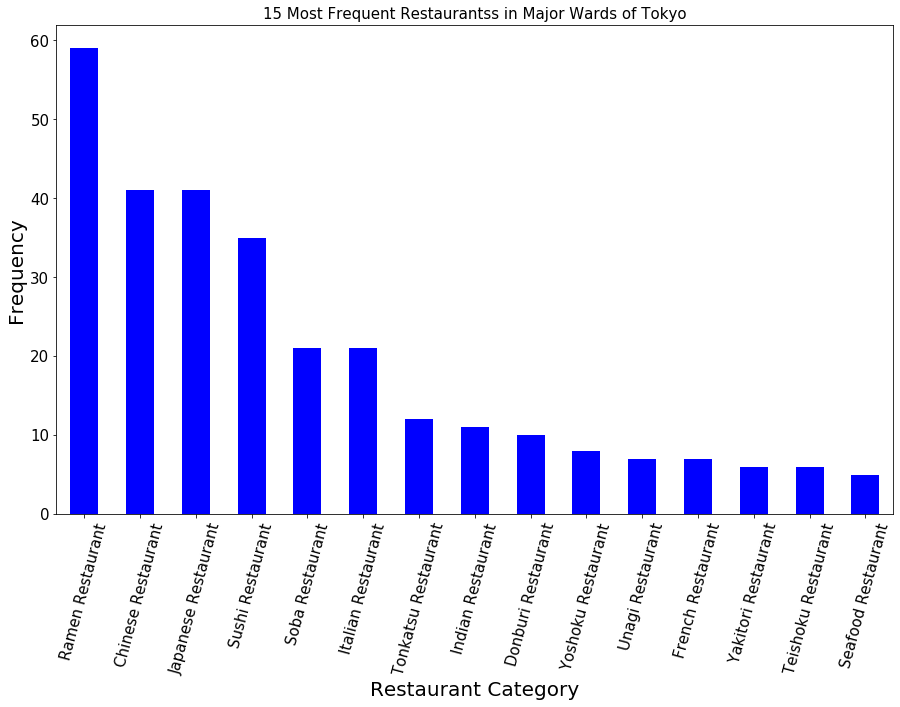

In [27]:
from matplotlib import pyplot as plt

Tokyo_Venues_Plot = Tokyo_Venues_Top15.set_index('Rest_Category')
Tokyo_Venues_Plot.plot(kind='bar', figsize=(15, 9),legend=False, fontsize=15, colormap="winter", rot=75)

plt.title('15 Most Frequent Restaurantss in Major Wards of Tokyo', fontsize=15)
plt.xlabel("Restaurant Category", fontsize=20)
plt.ylabel ("Frequency", fontsize=20)
plt.show()

#### Let's check the size of the resulting dataframe

In [28]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Tokyo_Venues_only_restaurant.shape)
Tokyo_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (359, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
2,Chiyoda,35.69381,139.753216,Sushi Masa (九段下 寿司政),35.695234,139.752227,Sushi Restaurant
3,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
4,Chiyoda,35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
5,Chiyoda,35.69381,139.753216,たいよう軒,35.696454,139.754809,Chinese Restaurant
6,Chiyoda,35.69381,139.753216,咸亨酒店,35.696010,139.756730,Chinese Restaurant
7,Chiyoda,35.69381,139.753216,Yojinbo (用心棒),35.696409,139.756696,Ramen Restaurant
8,Chiyoda,35.69381,139.753216,Fukumen Tomo (覆麺 智),35.696403,139.757070,Ramen Restaurant
9,Chiyoda,35.69381,139.753216,Kitchen Jiro (キッチンジロー),35.696688,139.751838,Yoshoku Restaurant
10,Chiyoda,35.69381,139.753216,紅楼夢,35.693624,139.758696,Chinese Restaurant


In [29]:
Tokyo_Venues_restaurant = Tokyo_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [30]:
Tokyo_Venues_restaurant 

Neighborhood
Adachi         3
Arakawa       14
Bunkyō         3
Chiyoda       36
Chūō          59
Edogawa        3
Itabashi       2
Katsushika     8
Kita          14
Kōtō           3
Meguro         7
Minato        10
Nakano        10
Setagaya       8
Shibuya       25
Shinagawa      6
Shinjuku      33
Suginami      11
Sumida        12
Taitō         27
Toshima       19
Ōta           46
Name: Venue Category, dtype: int64

#### Check the wards with the most restaurants in the collected data

In [31]:
Tokyo_Venues_restaurant.sort_values(axis=0, ascending=False)

Neighborhood
Chūō          59
Ōta           46
Chiyoda       36
Shinjuku      33
Taitō         27
Shibuya       25
Toshima       19
Arakawa       14
Kita          14
Sumida        12
Suginami      11
Nakano        10
Minato        10
Setagaya       8
Katsushika     8
Meguro         7
Shinagawa      6
Edogawa        3
Kōtō           3
Bunkyō         3
Adachi         3
Itabashi       2
Name: Venue Category, dtype: int64

#### Analyze Each Neighborhood

In [32]:
Tokyo_Venues_restaurant_df  = Tokyo_Venues_restaurant.to_frame().reset_index()
Tokyo_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Tokyo_Venues_restaurant_df.index = np.arange(1, len(Tokyo_Venues_restaurant_df)+1)
list_rest_no =Tokyo_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Tokyo_Venues_restaurant_df['Neighborhood'].to_list()

#### # One hot encoding

In [33]:
Tokyo_onehot = pd.get_dummies(Tokyo_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + list(Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.head()


,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,...,Taiwanese Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
1,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Chiyoda,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Tokyo_onehot.shape

(359, 51)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,...,Taiwanese Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arakawa,0.00,0.00,0.00,0.000000,0.214286,0.071429,0.000000,0.000000,0.000,...,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bunkyō,0.00,0.00,0.00,0.000000,0.333333,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chiyoda,0.00,0.00,0.00,0.000000,0.194444,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.027778,0.027778,0.055556,0.000000,0.000000,0.000000,0.000000,0.027778
4,Chūō,0.00,0.00,0.00,0.000000,0.016949,0.033898,0.000000,0.000000,0.000,...,0.000000,0.016949,0.033898,0.000000,0.016949,0.000000,0.033898,0.000000,0.016949,0.033898
5,Edogawa,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Itabashi,0.00,0.00,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Katsushika,0.00,0.00,0.00,0.000000,0.125000,0.250000,0.000000,0.125000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kita,0.00,0.00,0.00,0.000000,0.000000,0.071429,0.000000,0.071429,0.000,...,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kōtō,0.00,0.00,0.00,0.000000,0.666667,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Let's confirm the new size

In [36]:
Tokyo_grouped.shape

(22, 51)

#### We can see that there's not enough data about Nerima

#### Let's print each neighborhood along with the top 10 most common venues

In [37]:
num_top_venues = 10

for hood in Tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Tokyo_grouped[Tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                        venue  freq
0         Japanese Restaurant  0.67
1  Japanese Family Restaurant  0.33
2          African Restaurant  0.00
3        Monjayaki Restaurant  0.00
4      Okonomiyaki Restaurant  0.00
5            Ramen Restaurant  0.00
6                  Restaurant  0.00
7          Russian Restaurant  0.00
8          Seafood Restaurant  0.00
9      Shabu-Shabu Restaurant  0.00


----Arakawa----
                 venue  freq
0     Ramen Restaurant  0.29
1   Chinese Restaurant  0.21
2    Indian Restaurant  0.14
3  Teishoku Restaurant  0.07
4    Korean Restaurant  0.07
5  Japanese Restaurant  0.07
6   Italian Restaurant  0.07
7   Donburi Restaurant  0.07
8      Udon Restaurant  0.00
9  Sukiyaki Restaurant  0.00


----Bunkyō----
                    venue  freq
0      Chinese Restaurant  0.33
1     Japanese Restaurant  0.33
2     Szechuan Restaurant  0.33
3      African Restaurant  0.00
4     Sukiyaki Restaurant  0.00
5  Okonomiyaki Restaurant  0.00
6        Ra

#### Let's put that into a *pandas* dataframe

In [38]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [39]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Japanese Restaurant,Japanese Family Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant
1,Arakawa,Ramen Restaurant,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Donburi Restaurant,Teishoku Restaurant,Japanese Restaurant,Italian Restaurant,Yoshoku Restaurant,Korean BBQ Restaurant
2,Bunkyō,Chinese Restaurant,Japanese Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Family Restaurant
3,Chiyoda,Chinese Restaurant,Ramen Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Italian Restaurant,Tonkatsu Restaurant,Indian Restaurant,Restaurant
4,Chūō,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Tempura Restaurant,Donburi Restaurant,Yoshoku Restaurant,Soba Restaurant,Unagi Restaurant,Kushikatsu Restaurant
5,Edogawa,Ramen Restaurant,Italian Restaurant,Indian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
6,Itabashi,Chinese Restaurant,Italian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
7,Katsushika,Donburi Restaurant,Soba Restaurant,Korean Restaurant,Chinese Restaurant,Dumpling Restaurant,Ramen Restaurant,Indian Restaurant,Yoshoku Restaurant,Korean BBQ Restaurant,Kebab Restaurant
8,Kita,Ramen Restaurant,Soba Restaurant,Japanese Restaurant,Kushikatsu Restaurant,Donburi Restaurant,Teishoku Restaurant,Dumpling Restaurant,Italian Restaurant,Korean Restaurant,Korean BBQ Restaurant
9,Kōtō,Chinese Restaurant,Indian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant


## Results <a name="results"></a>

### Cluster Neighborhoods
#### First, let's check the proper number of clusters using the elbow method

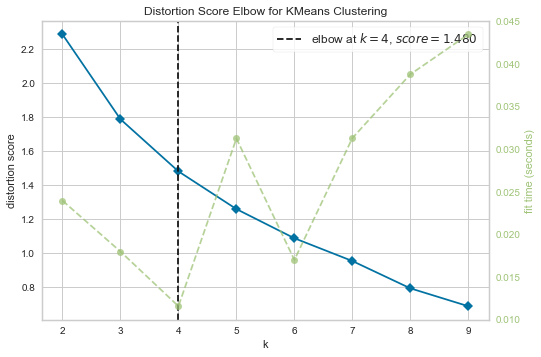

In [40]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(Tokyo_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### Run *k*-means to cluster the neighborhood into 4 clusters.

In [41]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 2, 1, 2, 1, 3, 1, 1, 2])

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [42]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = df

tokyo_merged.rename(columns={'Romaji':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# drop NAN rows
tokyo_merged.dropna(axis=0, inplace=True)
tokyo_merged.head() # check the last columns!

,Neighborhood,Kanji,Population,Pop. density per km2,Area in km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216,1.0,Chinese Restaurant,Ramen Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Italian Restaurant,Tonkatsu Restaurant,Indian Restaurant,Restaurant
1,Chūō,中央区,147620,14460,10.21,35.666255,139.775565,2.0,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Tempura Restaurant,Donburi Restaurant,Yoshoku Restaurant,Soba Restaurant,Unagi Restaurant,Kushikatsu Restaurant
2,Minato,港区,248071,12180,20.37,35.643227,139.740055,1.0,Soba Restaurant,Yakitori Restaurant,Indian Restaurant,Kosher Restaurant,Chinese Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,French Restaurant,Korean Restaurant
3,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632,1.0,Ramen Restaurant,Shabu-Shabu Restaurant,Thai Restaurant,Yakitori Restaurant,Chinese Restaurant,Teishoku Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Unagi Restaurant,Seafood Restaurant
4,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732,2.0,Chinese Restaurant,Japanese Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Family Restaurant


#### Let's visualize the resulting clusters

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], tokyo_merged['Longitude'], tokyo_merged['Neighborhood'], tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### If the map didn't appear, either mark it as trusted notebook or please click this link: https://github.com/Ganaini/Coursera_Capstone/blob/main/clusters_map.png

### Examine the Clusters
#### Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### Cluster 1

In [44]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,足立区,35.783703,139.795319,0.0,Japanese Restaurant,Japanese Family Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant


### Cluster 2

In [45]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 1, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,千代田区,35.693810,139.753216,1.0,Chinese Restaurant,Ramen Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Italian Restaurant,Tonkatsu Restaurant,Indian Restaurant,Restaurant
2,港区,35.643227,139.740055,1.0,Soba Restaurant,Yakitori Restaurant,Indian Restaurant,Kosher Restaurant,Chinese Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,French Restaurant,Korean Restaurant
3,新宿区,35.693763,139.703632,1.0,Ramen Restaurant,Shabu-Shabu Restaurant,Thai Restaurant,Yakitori Restaurant,Chinese Restaurant,Teishoku Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Unagi Restaurant,Seafood Restaurant
5,台東区,35.717450,139.790859,1.0,Ramen Restaurant,Soba Restaurant,Sushi Restaurant,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Nabe Restaurant,Sukiyaki Restaurant,Monjayaki Restaurant,Restaurant
10,大田区,35.561206,139.715843,1.0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Tonkatsu Restaurant,Italian Restaurant,Dumpling Restaurant,Yoshoku Restaurant,Udon Restaurant,Vietnamese Restaurant
11,世田谷区,35.646096,139.656270,1.0,Ramen Restaurant,Yoshoku Restaurant,Unagi Restaurant,Japanese Restaurant,Japanese Family Restaurant,Szechuan Restaurant,Fast Food Restaurant,Hotpot Restaurant,Korean BBQ Restaurant,Kebab Restaurant
12,渋谷区,35.664596,139.698711,1.0,Japanese Restaurant,Ramen Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant,Mexican Restaurant,South Indian Restaurant,American Restaurant,Asian Restaurant,Brazilian Restaurant
13,中野区,35.718123,139.664468,1.0,Ramen Restaurant,Chinese Restaurant,Italian Restaurant,Soba Restaurant,Tonkatsu Restaurant,Donburi Restaurant,Yoshoku Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant
14,杉並区,35.699493,139.636288,1.0,Ramen Restaurant,Italian Restaurant,Soba Restaurant,Tonkatsu Restaurant,Chinese Restaurant,Dumpling Restaurant,Sushi Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean BBQ Restaurant
15,豊島区,35.736156,139.714222,1.0,Ramen Restaurant,Soba Restaurant,Yoshoku Restaurant,Chinese Restaurant,Korean Restaurant,Japanese Family Restaurant,Dongbei Restaurant,Donburi Restaurant,Middle Eastern Restaurant,Tonkatsu Restaurant


### Cluster 3

In [46]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 2, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,中央区,35.666255,139.775565,2.0,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Tempura Restaurant,Donburi Restaurant,Yoshoku Restaurant,Soba Restaurant,Unagi Restaurant,Kushikatsu Restaurant
4,文京区,35.718810,139.744732,2.0,Chinese Restaurant,Japanese Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Family Restaurant
6,墨田区,35.700429,139.805017,2.0,Chinese Restaurant,Japanese Restaurant,Unagi Restaurant,Tonkatsu Restaurant,Ramen Restaurant,Sushi Restaurant,Indian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean BBQ Restaurant
7,江東区,35.649154,139.812790,2.0,Chinese Restaurant,Indian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
8,品川区,35.599252,139.738910,2.0,Chinese Restaurant,Soba Restaurant,Donburi Restaurant,Japanese Restaurant,Sushi Restaurant,Yoshoku Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant
9,目黒区,35.621250,139.688014,2.0,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Soba Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant


### Cluster 4

In [47]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 3, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,板橋区,35.774143,139.681209,3.0,Chinese Restaurant,Italian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Korean BBQ Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant


## Discussion <a name="Discussion"></a>

As the analysis showed, the 15 Most Frequent Restaurants in Major Wards of Tokyo don't any include any of our targeted niche restaurants (Halal/ Kosher/ Vegan) categories. <br>

By clustering the major neighborhood in Tokyo based on restaurants categories, we can see the following:
* Cluster1: Japanese restaurants dominate it. The 5th Most Common restaurant category is Kosher. 
* Cluster2: Ramen restaurants dominate it. The 4th Most Common restaurant category in Minato is Kosher, but nothing else at the other neighborhoods. 
* Cluster3: Chinese restaurants dominate it.  The 5th Most Common restaurant category in Koto is Kosher, but nothing else at the other neighborhoods. 
* Cluster4: Chinese restaurants dominate it. The 5th Most Common restaurant category is Kosher. 

We can also see that Chuo, Ota and Chiyoda cities have maximum number of restaurants, while Nerima and Itabashi have the least.

We should also take in consideration that some of the restaurants can be valid for Halal, Kosher, or Vegan meals. 
For example:
* Kosher restaurants are also be considered Halal.
* by my life experience in Tokyo, I can tell that most of Sushi/ Seafood/ Kebab/ Indian/ Restaurants menus are halal.
* For vegans, many Japanese Curry Restaurants and Hotpot menus are valid for vegans.

Another note is that these analysis depend on the available data from Foursquare and that we didn't consider other factors such as population density/ distance from train stations and so on.

## Conclusion <a name="conclusion"></a>

* There are many real-life problems or scenarios where data can be used to find solutions to those problems. Like seen in the example above, data was used to cluster neighborhoods in Tokyo based on the most common food Restaurants in its 23 major districts. The results can help an investor to decide about the district that fit the new restaurant project. <br>
* I have made use of some frequently used python libraries to scrap web-data, use Foursquare API to explore the major districts of Tokyo and saw the results of segmentation of districts using Folium map.
* The analysis shows the potential of opening new niche restaurants for clients with food restrictions ( Halal, Kosher, or Vegan in this study).
* Similarly, data can also be used to solve other problems, which most people face in metropolitan cities.


